In [1]:
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("utils")
sys.path.append("models")

# Importem les funcions
from ipynb.fs.full.split_data import split_data 
from ipynb.fs.full.create_result_folders import create_result_folders
from ipynb.fs.full.train import train
from ipynb.fs.full.validation import validate
from ipynb.fs.full.test import test

from torchvision import datasets, transforms

# Importem les clases 
from ipynb.fs.full.average_meter import Meters
from ipynb.fs.full.models import *
from ipynb.fs.full.convert_2_grayscale import Convert2Grayscale

In [2]:
use_gpu = torch.cuda.is_available()

In [3]:
input_path = r'C:\Users\alber\OneDrive\Desktop\MatCAD\3r Curso\2n semestre\Xarxes Neuronals i Aprenentatge Profund\PROJECTE\Proyecto Nuestro\data\random_images'
output_path = 'data/random_images/split_images'
if not os.path.exists(output_path):
    split_data(input_path, output_path,.8,.2)

In [4]:
# Opcions
model = CNNColor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0)
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=30)

train_path = r'C:\Users\alber\OneDrive\Desktop\MatCAD\3r Curso\2n semestre\Xarxes Neuronals i Aprenentatge Profund\PROJECTE\Proyecto Nuestro\data\random_images\split_images\train'
val_path = r'C:\Users\alber\OneDrive\Desktop\MatCAD\3r Curso\2n semestre\Xarxes Neuronals i Aprenentatge Profund\PROJECTE\Proyecto Nuestro\data\random_images\split_images\val'
model_saved_path = 'checkpoints/model_random.pt'

save_images = True
best_losses = 1e10
epochs = 100

In [5]:
# Entrenament
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip()])
train_imagefolder = Convert2Grayscale(train_path , train_transforms)
train_loader = torch.utils.data.DataLoader(train_imagefolder, batch_size=64, shuffle=True)

In [6]:
# Validacio
val_transforms = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224)])
val_imagefolder = Convert2Grayscale(val_path , val_transforms)
val_loader = torch.utils.data.DataLoader(val_imagefolder, batch_size=64, shuffle=False)

In [7]:
# Movem el model a la GPU
if use_gpu: 
    criterion = criterion.cuda()
    model = model.cuda()

In [8]:
# Creem les carpetes de outputs
create_result_folders()

In [8]:
# Entrenem el model
losses = {"train": [], "val": []}
for epoch in range(epochs):
    
    # Fem el entrenament i la validacio
    train_loss = train(train_loader, model, criterion, optimizer, epoch, epochs)
    scheduler.step()
    losses["train"].append(train_loss)
    
    with torch.no_grad():
        val_loss = validate(val_loader, model, criterion, save_images, epoch, epochs)
        scheduler.step()
        losses["val"].append(val_loss)
    # Guardem a la caprta checkpoints l'estat del model
    if val_loss < best_losses:
        best_losses = val_loss
        torch.save(model.state_dict(), 'checkpoints/model_random-epoch-{}-losses-{:.3f}.pth'.format(epoch+1,val_loss))

Epoch : 1/100, Train loss = 0.3198, Time = 10.443
Epoch : 1/100, Train loss = 0.0334, Time = 2.584
Epoch : 1/100, Train loss = 0.0192, Time = 2.494
Epoch : 1/100, Train loss = 0.0144, Time = 2.446
Epoch : 1/100, Train loss = 0.0118, Time = 2.453
Epoch : 1/100, Train loss = 0.0102, Time = 2.457
Epoch : 1/100, Train loss = 0.0092, Time = 2.461
Epoch : 1/100, Train loss = 0.0084, Time = 2.466
Epoch : 1/100, Train loss = 0.0079, Time = 2.472
Epoch : 1/100, Train loss = 0.0074, Time = 2.478
Epoch : 1/100, Train loss = 0.0071, Time = 2.498
Epoch : 1/100, Train loss = 0.0068, Time = 2.511
Epoch : 1/100, Train loss = 0.0065, Time = 2.520
Epoch : 1/100, Train loss = 0.0063, Time = 2.527
Epoch : 1/100, Train loss = 0.0061, Time = 2.541
Epoch : 1/100, Train loss = 0.0060, Time = 2.547
Validate : 1/100, Val loss = 0.0032, Time = 3.310
Validate : 1/100, Val loss = 0.0033, Time = 2.822
Validate : 1/100, Val loss = 0.0034, Time = 2.778
Validate : 1/100, Val loss = 0.0033, Time = 2.750
Epoch : 2/100, 

Epoch : 9/100, Train loss = 0.0034, Time = 2.843
Epoch : 9/100, Train loss = 0.0034, Time = 2.845
Epoch : 9/100, Train loss = 0.0034, Time = 2.834
Epoch : 9/100, Train loss = 0.0034, Time = 2.823
Epoch : 9/100, Train loss = 0.0034, Time = 2.820
Epoch : 9/100, Train loss = 0.0033, Time = 2.818
Epoch : 9/100, Train loss = 0.0033, Time = 2.814
Epoch : 9/100, Train loss = 0.0033, Time = 2.804
Epoch : 9/100, Train loss = 0.0033, Time = 2.801
Validate : 9/100, Val loss = 0.0034, Time = 3.490
Validate : 9/100, Val loss = 0.0035, Time = 2.677
Validate : 9/100, Val loss = 0.0035, Time = 2.787
Validate : 9/100, Val loss = 0.0034, Time = 2.802
Epoch : 10/100, Train loss = 0.0029, Time = 2.503
Epoch : 10/100, Train loss = 0.0035, Time = 2.578
Epoch : 10/100, Train loss = 0.0034, Time = 2.617
Epoch : 10/100, Train loss = 0.0034, Time = 2.626
Epoch : 10/100, Train loss = 0.0034, Time = 2.640
Epoch : 10/100, Train loss = 0.0034, Time = 2.653
Epoch : 10/100, Train loss = 0.0034, Time = 2.666
Epoch : 1

Epoch : 17/100, Train loss = 0.0033, Time = 2.923
Epoch : 17/100, Train loss = 0.0033, Time = 2.903
Epoch : 17/100, Train loss = 0.0033, Time = 2.881
Epoch : 17/100, Train loss = 0.0033, Time = 2.863
Epoch : 17/100, Train loss = 0.0032, Time = 2.859
Validate : 17/100, Val loss = 0.0029, Time = 3.147
Validate : 17/100, Val loss = 0.0032, Time = 2.731
Validate : 17/100, Val loss = 0.0032, Time = 2.702
Validate : 17/100, Val loss = 0.0032, Time = 2.679
Epoch : 18/100, Train loss = 0.0034, Time = 2.714
Epoch : 18/100, Train loss = 0.0031, Time = 2.715
Epoch : 18/100, Train loss = 0.0032, Time = 2.729
Epoch : 18/100, Train loss = 0.0032, Time = 2.826
Epoch : 18/100, Train loss = 0.0032, Time = 2.887
Epoch : 18/100, Train loss = 0.0032, Time = 2.893
Epoch : 18/100, Train loss = 0.0032, Time = 2.873
Epoch : 18/100, Train loss = 0.0032, Time = 2.873
Epoch : 18/100, Train loss = 0.0032, Time = 2.880
Epoch : 18/100, Train loss = 0.0032, Time = 2.882
Epoch : 18/100, Train loss = 0.0032, Time = 2.

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

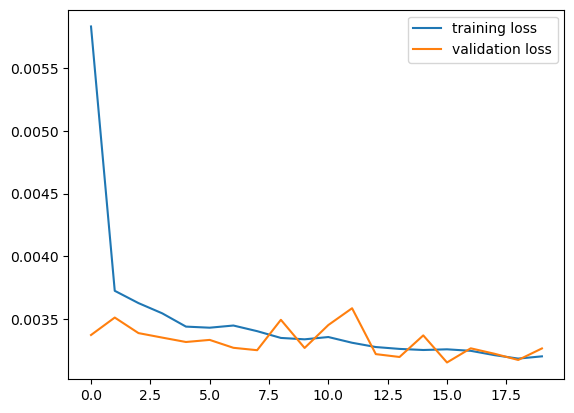

In [9]:
# Veiem les losses
plt.plot(losses["train"], label="training loss")
plt.plot(losses["val"], label="validation loss")

plt.legend()
plt.pause(0.000001)
plt.show()

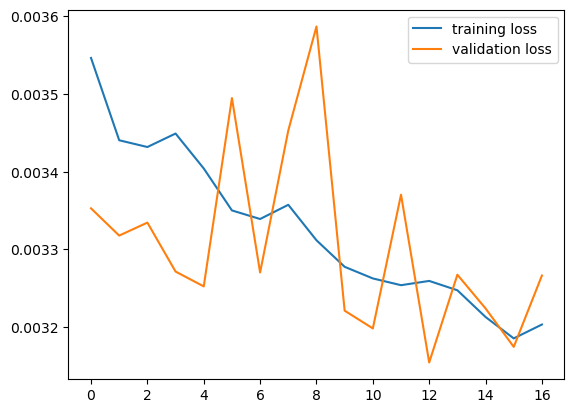

In [10]:
# Veiem les losses
plt.plot(losses["train"][3:], label="training loss")
plt.plot(losses["val"][3:], label="validation loss")

plt.legend()
plt.pause(0.000001)
plt.show()

In [11]:
# Guardem el model una vegda ja entrenat
torch.save(model, model_saved_path)

In [9]:
# Importem el model entrenat
model_entrenat = CNNColor()

if use_gpu: 
    criterion = criterion.cuda()
    model_entrenat = model_entrenat.cuda()

model_entrenat.load_state_dict(torch.load('checkpoints/model_random-epoch-16-losses-0.003.pth'))
test_loss = test(val_loader, model_entrenat, criterion, save_images)

Test loss = 0.0030, Time = 5.133
Test loss = 0.0031, Time = 3.922
Test loss = 0.0031, Time = 3.475
Test loss = 0.0031, Time = 3.366


<Figure size 640x480 with 0 Axes>